In [8]:
import numpy as np 
import pandas as pd 
from pathlib import Path
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
base_path = Path("/content/drive/My Drive/")

In [10]:
dir_path = 'Colab Notebooks/Data'

In [11]:
file_path = "Store Sales_train.csv"

final_path = os.path.join(dir_path,file_path)
final_path 

'Colab Notebooks/Data/Store Sales_train.csv'

In [12]:
final_path = os.path.join(base_path, dir_path,file_path)

df = pd.read_csv(final_path )
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


# **[ 기술통계 ]**

In [13]:
df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [14]:
df.describe(include='object')

,date,family
count,3000888,3000888
unique,1684,33
top,2013-01-01,AUTOMOTIVE
freq,1782,90936


### 중심위치

In [15]:
# 평균
df['sales'].mean()

357.77574911262707

In [16]:
# 중앙값
df['sales'].median()

11.0

### 산포

In [17]:
# 분산
df['sales'].var()

1214398.9778380839

In [18]:
# 표준편차
df['sales'].std()

1101.9977213397874

In [19]:
# 사분위수
q1 = df['sales'].quantile(0.25)
q2 = df['sales'].quantile(0.50)
q3 = df['sales'].quantile(0.75)
#q3 = df['sales'].quantile(q=0.75, interpolation='nearest')
q4 = df['sales'].quantile(1)

# 사분위수범위(interquartile range)
IQR = q3 - q1

print("Q1 = ", q1)
print("Q2 = ", q2)
print("Q3 = ", q3)
print("Q4 = ", q4)

print("IQR = ", IQR)

Q1 =  0.0
Q2 =  11.0
Q3 =  195.84725
Q4 =  124717.0
IQR =  195.84725


In [20]:
# numpy도 가능
data = np.array(df['sales'])
np.percentile(data, [0, 25, 50, 75, 100], interpolation='nearest')

array([0.00000e+00, 0.00000e+00, 1.10000e+01, 1.95847e+02, 1.24717e+05])

In [21]:
# 백분위수
df['sales'].quantile(0.33)

1.0

In [22]:
# 변동계수 = 표준편차 / 평균
# 관측값이 중심값에서 얼마나 퍼져 있는지를 보여준다. 
cv_sales = df['sales'].std() / df['sales'].mean()
cv_onpromotion = df['onpromotion'].std() / df['onpromotion'].mean()
print(cv_sales, cv_onpromotion)

3.0801353196045738 4.694568167115763


# 표준편차와 표준오차의 차이

- 표준오차를 이해하기 위해 알아야할 사실은 "표준평균은 분포를 가진다"는 것이다
- 표집(Sampling)을 하는 순간 분포가 생긴다. 
- 심지어 단 "한번만"해도 생긴다.  

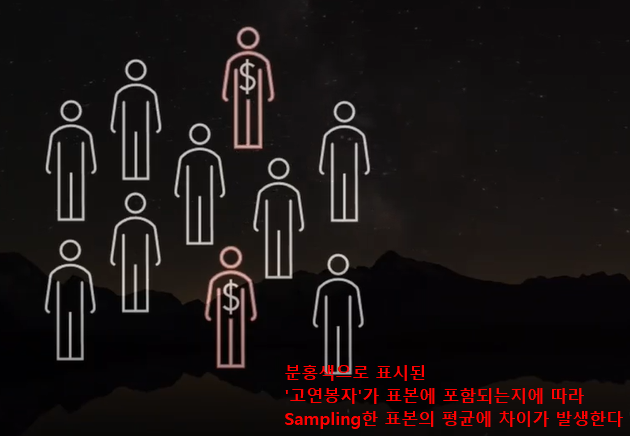

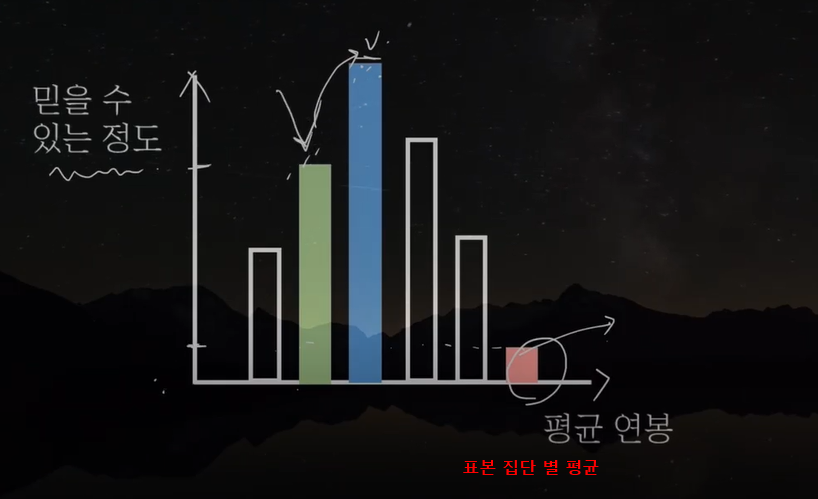

- Sampling을 통해 얻은 값이 믿음직한지 파악하기 위해 표준오차를 사용한다. 

###### 참고
- [수식없는 표준오차](https://www.youtube.com/watch?v=50_PzXRV_vE)


In [23]:
# 표준오차 = 표준편차 / sqrt(N)
# !!! 표본평균은 분포를 가진다
df['sales'].sem()

0.6361445386361864

In [32]:
df['sales'].std() / np.sqrt(len(df['sales']))

0.6361445386361864

### 분포형태

In [33]:
# 왜도
df['sales'].skew()

7.358757818882655

In [34]:
# 첨도
df['sales'].kurt()

154.5620923696481

### 그래프

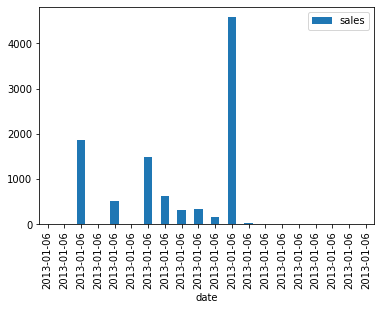

In [35]:
# 막대그래프
df_temp = df.iloc[10000:10020]
df_temp.plot.bar(x='date', y='sales')

(array([1.899e+03, 1.358e+03, 9.690e+02, 7.120e+02, 4.180e+02, 2.680e+02,
        1.600e+02, 8.600e+01, 5.200e+01, 3.300e+01, 1.800e+01, 5.000e+00,
        8.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

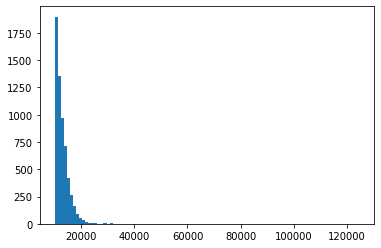

In [36]:
# 히스토그램
import matplotlib.pyplot as plt

#df_temp = df
df_temp = df[df['sales'] > 10000]
plt.hist(df_temp['sales'], bins=100)

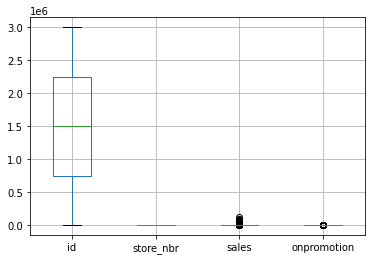

In [37]:
# 상자그림
df.boxplot()

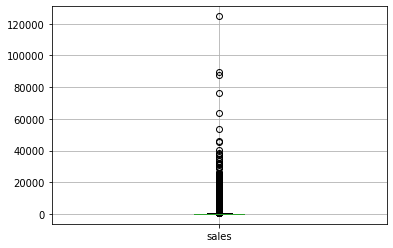

In [38]:
df.boxplot(column=['sales'])

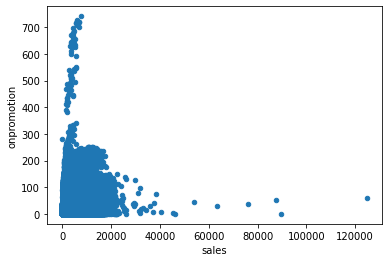

In [39]:
# 산점도
df.plot.scatter(x='sales', y='onpromotion')

# **[ 상관분석 ]**

In [40]:
# 상관계수
corr = df.corr(method='pearson')
print(corr)

                   id  store_nbr     sales  onpromotion
id           1.000000   0.000301  0.085784     0.206260
store_nbr    0.000301   1.000000  0.041196     0.007286
sales        0.085784   0.041196  1.000000     0.427923
onpromotion  0.206260   0.007286  0.427923     1.000000


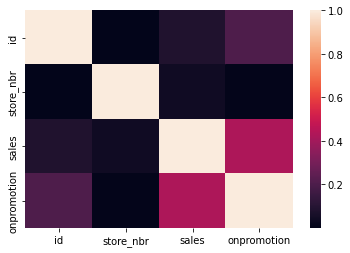

In [41]:
import seaborn as sns

sns.heatmap(corr)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


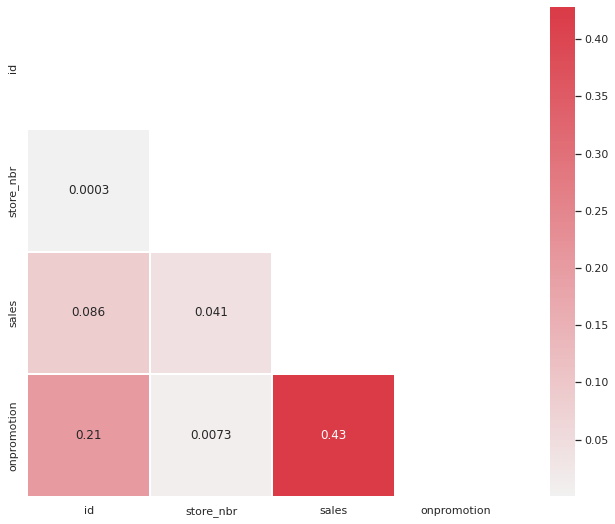

In [42]:
sns.set(style="white")
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f,ax=plt.subplots(figsize=(12,9))
cmap=sns.diverging_palette(200,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=True,
            linewidths=0.5,cbar_kws={"shrink":1},annot=True)

In [43]:
# 상관계수의 검정
import scipy.stats as stats
df1 = df['sales']
df2 = df['onpromotion']
stats.pearsonr(df1, df2)

(0.4279232048122211, 0.0)

# t-검정

### 단일표본 t-검정

In [44]:
# 정규성 검정 - Shaprio-Wilks test
# H0: sales 데이터가 정규분포다
# H1: sales 데이터가 정규분포가 아니다
stats.shapiro(df['sales'].iloc[:20000])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.29215097427368164, 0.0)

In [45]:
stats.ttest_1samp(df['sales'], 357)

Ttest_1sampResult(statistic=1.2194541735488387, pvalue=0.2226719549779439)

### 대응표본 t-검정

In [50]:
sales_auto = df['sales'][df['family'] == 'AUTOMOTIVE']
sales_beauty = df['sales'][df['family'] == 'BEAUTY']

In [51]:
# 정규성 검정 - D’Agostino’s K^2 Test
print(stats.normaltest(sales_auto))
print(stats.normaltest(sales_beauty))

NormaltestResult(statistic=67311.0392276939, pvalue=0.0)
NormaltestResult(statistic=63645.9329708086, pvalue=0.0)


In [52]:
stats.ttest_rel(df['sales'], df['onpromotion'])

Ttest_relResult(statistic=560.9545020911651, pvalue=0.0)

### 독립표본 t-검정



In [53]:
# 정규성 검정 Kolmogorove-Smirnov test
print(stats.kstest(df['sales'], 'norm'))
print(stats.kstest(df['onpromotion'], 'norm'))

KstestResult(statistic=0.6257595758449808, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)


In [54]:
# 등분산성 검정
stats.levene(df['sales'], df['onpromotion'])

LeveneResult(statistic=310553.8379904399, pvalue=0.0)

In [55]:
stats.ttest_ind(df['sales'], df['onpromotion'])

Ttest_indResult(statistic=558.2868772831957, pvalue=0.0)

# 분산분석(ANOVA)

### 일원배치 분산분석

In [56]:
sales_auto = df['sales'][df['family'] == 'AUTOMOTIVE'][:2000]
sales_beauty = df['sales'][df['family'] == 'BEAUTY'][:2000]
sales_book = df['sales'][df['family'] == 'BOOKS'][:2000]


# f-test
stats.f_oneway(sales_auto, sales_beauty, sales_book)

F_onewayResult(statistic=677.4777718168455, pvalue=5.323937710306516e-266)

In [57]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [58]:
model = ols('sales ~ C(family)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(family),32.0,1.810352e+12,5.657350e+10,92571.48346,0.0
Residual,3000855.0,1.833922e+12,6.111332e+05,NaN,NaN


### 이원배치 분산분석

H0: family와 store_nbr 간 교호작용이 없다.
<br>
H1: family와 store_nbr 간 교호작용이 존재한다.

In [59]:
df_temp = df.iloc[:2000]
model = ols('sales ~ C(family) + C(store_nbr) + C(family):C(store_nbr)', df_temp).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(family),32.0,1.238075e+07,386898.459649,1.139230,0.287803
C(store_nbr),53.0,7.370763e+06,139070.998820,0.409497,0.999891
C(family):C(store_nbr),1696.0,5.381944e+07,31733.162026,0.093439,1.000000
Residual,218.0,7.403585e+07,339614.009385,NaN,NaN


### 다변량 분산분석

# 교차분석

In [64]:
final_path2 = os.path.join(base_path, dir_path, "holidays_events.csv")
final_path2

'/content/drive/My Drive/Colab Notebooks/Data/holidays_events.csv'

In [66]:
df2 = pd.read_csv(final_path2)
df2

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [67]:
df2_ct1 = df2['type'].value_counts()
df2_ct1 = pd.DataFrame(df2_ct1)
df2_ct1['type_ex'] = [200, 50, 50, 20, 20, 10]
df2_ct1

,type,type_ex
Holiday,221,200
Event,56,50
Additional,51,50
Transfer,12,20
Bridge,5,20
Work Day,5,10


### 적합도 검정(one-way)

In [68]:
stats.chisquare(df2_ct1['type'], f_exp=df2_ct1['type_ex'])

Power_divergenceResult(statistic=19.895, pvalue=0.001307713669761688)

### 독립성 검정, 동일성검정(two-way)

In [69]:
df2_ct2 = pd.crosstab(df2['type'], df2['locale'])
df2_ct2

locale,Local,National,Regional
type,,,
Additional,11,40,0
Bridge,0,5,0
Event,0,56,0
Holiday,137,60,24
Transfer,4,8,0
Work Day,0,5,0


H0: type과 locale은 독립적이다
<br>
H1: .. 독립적이지 않다.

In [70]:
stats.chi2_contingency(df2_ct2)

# chi-squre, pvalue, df, expected value

(131.45802366737567,
 2.3544912183604968e-23,
 10,
 array([[ 22.14857143,  25.35428571,   3.49714286],
        [  2.17142857,   2.48571429,   0.34285714],
        [ 24.32      ,  27.84      ,   3.84      ],
        [ 95.97714286, 109.86857143,  15.15428571],
        [  5.21142857,   5.96571429,   0.82285714],
        [  2.17142857,   2.48571429,   0.34285714]]))